## Zeno zonal statistics
Testing for the GEE driven agents

In [1]:
import ee
import google.auth
from google.oauth2.service_account import Credentials

# Path to the service account JSON key file
service_account_key = "../ee-wri-lcl-zeno-2599d0871370.json"

# Specify the required OAuth scopes for Earth Engine
scopes = [
    "https://www.googleapis.com/auth/earthengine",
    "https://www.googleapis.com/auth/cloud-platform",
]

# Create credentials with the specified scopes
credentials = Credentials.from_service_account_file(service_account_key, scopes=scopes)

# Initialize Earth Engine with the service account credentials
ee.Initialize(credentials)

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


### Utils
For printing layer metadata

In [2]:
def print_meta(layer):
    # Get all metadata as a dictionary
    metadata = layer.getInfo()

    # Print metadata
    print("Image Metadata:")
    for key, value in metadata.items():
        print(f"{key}: {value}")

### GDAM data
For finding boundaries

In [3]:
import geopandas as gpd

gadm = gpd.read_file("/Users/tam/Downloads/gadm_410.gpkg")

### Natural lands
As reference land cover statistics

In [4]:
natural_lands = ee.Image("WRI/SBTN/naturalLands/v1/2020").select("classification")
print_meta(natural_lands)

Image Metadata:
type: Image
bands: [{'id': 'classification', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [1439601, 540001], 'crs': 'EPSG:4326', 'crs_transform': [0.00025, 0, -179.9, 0, -0.00025, 75]}]
version: 1725397479424399
id: WRI/SBTN/naturalLands/v1/2020
properties: {'system:time_start': 1577836800000, 'classification_class_values': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'natural_class_values': [0, 1], 'system:footprint': {'type': 'LinearRing', 'coordinates': [[-180, -90], [180, -90], [180, 90], [-180, 90], [-180, -90]]}, 'system:time_end': 1609459200000, 'natural_class_palette': ['969696', 'A8DDB5'], 'system:asset_size': 20189186972, 'classification_class_palette': ['246E24', 'B9B91E', '6BAED6', '06A285', 'FEFECC', 'ACD1E8', '589558', '093D09', 'DBDB7B', '99991A', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3', 'D3D3D3'], 'system:index': '2020'}


### MODIS landcover
As an alternative classification source.

In [5]:
# Load MODIS land cover categories in 2001.
# Select the IGBP classification band.
modis_landcover = ee.Image("MODIS/051/MCD12Q1/2001_01_01").select("Land_Cover_Type_1")

print_meta(modis_landcover)

Image Metadata:
type: Image
bands: [{'id': 'Land_Cover_Type_1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [86400, 43200], 'crs': 'SR-ORG:6974', 'crs_transform': [463.3127165279165, 0, -20015109.353988, 0, -463.3127165274999, 10007554.676994]}]
version: 1507158666650252
id: MODIS/051/MCD12Q1/2001_01_01
properties: {'Land_Cover_Type_4_class_names': ['Water', 'Evergreen Needleleaf vegetation', 'Evergreen Broadleaf vegetation', 'Deciduous Needleleaf vegetation', 'Deciduous Broadleaf vegetation', 'Annual Broadleaf vegetation', 'Annual grass vegetation', 'Non-vegetated land', 'Urban', 'Unclassified'], 'Land_Cover_Type_5_class_names': ['Water', 'Evergreen Needleleaf trees', 'Evergreen Broadleaf trees', 'Deciduous Needleleaf trees', 'Deciduous Broadleaf trees', 'Shrub', 'Grass', 'Cereal crops', 'Broad-leaf crops', 'Urban and built-up', 'Snow and ice', 'Barren or sparse vegetation', 'Unclassified'], 'Land_Cover_Type_1_class_palette': ['aec3d6', 

### DIST Alerts
For the alerts themselves

In [6]:
folder = "projects/glad/HLSDIST/current"
# // var alt_folder = "projects/glad/HLSDIST/backend"
VEGDISTSTATUS = ee.ImageCollection(folder + "/VEG-DIST-STATUS").mosaic()
VEGDISTDATE = ee.ImageCollection(folder + "/VEG-DIST-DATE").mosaic()
VEGDISTDUR = ee.ImageCollection(folder + "/VEG-DIST-DUR").mosaic()
VEGANOMMAX = ee.ImageCollection(folder + "/VEG-ANOM-MAX").mosaic()
VEGDISTCONF = ee.ImageCollection(folder + "/VEG-DIST-CONF").mosaic()
VEGDISTCOUNT = ee.ImageCollection(folder + "/VEG-DIST-COUNT").mosaic()
VEGIND = ee.ImageCollection(folder + "/VEG-IND").mosaic()
VEGANOM = ee.ImageCollection(folder + "/VEG-ANOM").mosaic()
VEGHIST = ee.ImageCollection(folder + "/VEG-HIST").mosaic()
VEGLASTDATE = ee.ImageCollection(folder + "/VEG-LAST-DATE").mosaic()

GENDISTSTATUS = ee.ImageCollection(folder + "/GEN-DIST-STATUS").mosaic()
GENDISTDATE = ee.ImageCollection(folder + "/GEN-DIST-DATE").mosaic()
GENDISTDUR = ee.ImageCollection(folder + "/GEN-DIST-DUR").mosaic()
GENANOMMAX = ee.ImageCollection(folder + "/GEN-ANOM-MAX").mosaic()
GENDISTCONF = ee.ImageCollection(folder + "/GEN-DIST-CONF").mosaic()
GENDISTCOUNT = ee.ImageCollection(folder + "/GEN-DIST-COUNT").mosaic()
GENANOM = ee.ImageCollection(folder + "/GEN-ANOM").mosaic()
GENLASTDATE = ee.ImageCollection(folder + "/GEN-LAST-DATE").mosaic()

print_meta(VEGDISTSTATUS)

Image Metadata:
type: Image
bands: [{'id': 'b1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]


### Select GADM area
This will come from the user eventually, now its a random GADM.

In [7]:
gadm

,UID,GID_0,NAME_0,VARNAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,ISO_1,HASC_1,...,ENGTYPE_5,GOVERNEDBY,SOVEREIGN,DISPUTEDBY,REGION,VARREGION,COUNTRY,CONTINENT,SUBCONT,geometry
0,1,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((71.41149 36.55717, 71.40954 36..."
1,2,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((71.2762 38.00465, 71.27578 38...."
2,3,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((70.78272 37.27678, 70.78635 37..."
3,4,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((71.41149 36.55717, 71.40091 36..."
4,5,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((70.71236 37.07621, 70.73582 37..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356503,356504,ZWE,Zimbabwe,,ZWE.10_1,Midlands,,,ZW-MI,ZW.MI,...,,,Zimbabwe,,,,Zimbabwe,Africa,,"MULTIPOLYGON (((29.75637 -20.33492, 29.75664 -..."
356504,356505,ZWE,Zimbabwe,,ZWE.10_1,Midlands,,,ZW-MI,ZW.MI,...,,,Zimbabwe,,,,Zimbabwe,Africa,,"MULTIPOLYGON (((29.84425 -20.10055, 29.84955 -..."
356505,356506,ZWE,Zimbabwe,,ZWE.10_1,Midlands,,,ZW-MI,ZW.MI,...,,,Zimbabwe,,,,Zimbabwe,Africa,,"MULTIPOLYGON (((30.03103 -20.27994, 30.03089 -..."
356506,356507,ZWE,Zimbabwe,,ZWE.10_1,Midlands,,,ZW-MI,ZW.MI,...,,,Zimbabwe,,,,Zimbabwe,Africa,,"MULTIPOLYGON (((30.08165 -20.19866, 30.0812 -2..."


18905


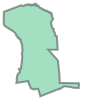

In [8]:
aoi = gadm.iloc[18904]
print(aoi.UID)
aoi.geometry

In [9]:
coords = list(aoi.geometry.geoms[0].exterior.coords)
geom = ee.Geometry.Polygon(coords)
features = ee.FeatureCollection([ee.Feature(geom)])

### Create statistics
Compute statistics and vectorize

In [10]:
modis_landcover.projection().getInfo()

{'type': 'Projection',
 'crs': 'SR-ORG:6974',
 'transform': [463.3127165279165,
  0,
  -20015109.353988,
  0,
  -463.3127165274999,
  10007554.676994]}

In [11]:
# privisional_50_or_better = VEGDISTSTATUS
provisional_50_or_better = (
    ee.ImageCollection(folder + "/VEG-DIST-STATUS").mosaic().gte(5)
)  # filter(ee.Filter.gte('b1', 5)).mosaic()

print_meta(provisional_50_or_better)

combo = provisional_50_or_better.addBands(natural_lands)

print_meta(combo)

zone_stats = combo.reduceRegions(
    collection=features,
    reducer=ee.Reducer.sum().group(groupField=1, groupName="classification"),
    scale=30,
).getInfo()

for feat in zone_stats["features"]:
    print(feat["properties"])

Image Metadata:
type: Image
bands: [{'id': 'b1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 1}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]
Image Metadata:
type: Image
bands: [{'id': 'b1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 1}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'classification', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [1439601, 540001], 'crs': 'EPSG:4326', 'crs_transform': [0.00025, 0, -179.9, 0, -0.00025, 75]}]
{'groups': [{'classification': 2, 'sum': 15568070.67058823}, {'classification': 3, 'sum': 2535256.505882352}, {'classification': 4, 'sum': 4245.278431372549}, {'classification': 6, 'sum': 950.1686274509805}, {'classification': 8, 'sum': 1166988.8666666667}, {'classification': 9, 'sum': 46655.08235294118}, {'classification': 10, 'sum': 497857.60392156866}, {'classification': 11, 'sum': 95474.6}, {'classification': 12, 

### Create vectors from dist alerts
Extract vectorized mask

Vectorized Features Metadata:
{'type': 'FeatureCollection', 'columns': {'count': 'Long<0, 4294967295>', 'label': 'Short<0, 255>', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-62.13984940477195, -13.780499529532293], [-62.130866251930755, -13.780499529532293], [-62.130866251930755, -13.771516376691096], [-62.13984940477195, -13.771516376691096], [-62.13984940477195, -13.780499529532293]]]}, 'id': '+13109+9882', 'properties': {'count': 1, 'label': 2}}, {'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-62.13984940477195, -14.139825643180103], [-62.130866251930755, -14.139825643180103], [-62.130866251930755, -14.130842490338907], [-62.13984940477195, -14.130842490338907], [-62.13984940477195, -14.139825643180103]]]}, 'id': '+13109+9922', 'properties': {'count': 1, 'label': 2}}, {'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-

<Axes: >

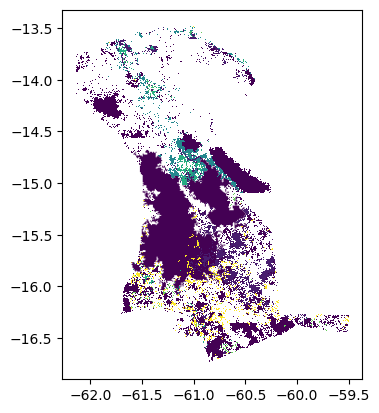

In [12]:
vectorize = natural_lands.updateMask(VEGDISTSTATUS.gt(5))  # .clipToCollection(features)

# Vectorize the masked classification
vectors = vectorize.reduceToVectors(
    # vectors = VEGDISTSTATUS.gt(5).selfMask().reduceToVectors(
    geometryType="polygon",  # Create polygons
    # reducer=ee.Reducer.countEvery(),  # Count all pixels in each polygon
    # reducer=ee.Reducer.sum().group(groupField=1, groupName="classification"),
    scale=1000,  # Scale in meters (adjust based on dataset resolution)
    # maxPixels=1e8,  # Adjust for larger areas
    geometry=features,
    eightConnected=True,
)

# Print vectorized result metadata
print("Vectorized Features Metadata:")
print(vectors.getInfo())

gdf = gpd.GeoDataFrame.from_features(vectors.getInfo()["features"])
gdf.plot(column="label")

In [13]:
gdf

,geometry,count,label
0,"POLYGON ((-62.13985 -13.7805, -62.13087 -13.78...",1,2
1,"POLYGON ((-62.13985 -14.13983, -62.13087 -14.1...",1,2
2,"POLYGON ((-62.13087 -13.76253, -62.12188 -13.7...",1,2
3,"POLYGON ((-62.13985 -13.92423, -62.12188 -13.9...",16,2
4,"POLYGON ((-62.13087 -14.04101, -62.12188 -14.0...",1,2
...,...,...,...
2182,"POLYGON ((-59.52575 -16.43951, -59.51677 -16.4...",2,3
2183,"POLYGON ((-59.53474 -16.38561, -59.50779 -16.3...",6,2
2184,"POLYGON ((-59.50779 -16.29578, -59.4988 -16.29...",4,2
2185,"POLYGON ((-59.50779 -16.30477, -59.4988 -16.30...",2,15
